## Install Dependencies

In [ ]:
from IPython.display import clear_output
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1
!pip install captum
!pip install opencv-python
!pip install seaborn
!pip install matplotlib
!pip install cleverhans
!pip install cachetools
!pip install pandas
!apt-get update && apt-get install ffmpeg libsm6 libxext6  -y
!pip install captum
!pip install cleverhans
clear_output()

In [2]:
import os, cv2,itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob
from PIL import Image

# pytorch libraries
import torch
from torch import optim,nn
from torch.autograd import Variable
from torch.utils.data import DataLoader,Dataset
from torchvision import models,transforms

# sklearn libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pickle
import main

# to make the results are reproducible
np.random.seed(10)
torch.manual_seed(10)
torch.cuda.manual_seed(10)

import gc
from load_skin import load_skin_data
from adv2 import adv2, load_data
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

/opt/conda/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
from IPython.display import clear_output
from captum.attr import IntegratedGradients
from captum.attr import Saliency
from captum.attr import GradientShap
from captum.attr import visualization as viz
from cleverhans.torch.attacks.fast_gradient_method import fast_gradient_method
from cleverhans.torch.attacks.carlini_wagner_l2 import carlini_wagner_l2
from cleverhans.torch.attacks.projected_gradient_descent import (
    projected_gradient_descent
)
clear_output()

## Dataset

In [4]:
train_loader, val_loader = load_skin_data()

/root/load_skin.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train=df_train.append([df_train.loc[df_train['cell_type_idx'] == i,:]]*(data_aug_rate[i]-1), ignore_index=True)


## Model

In [5]:
model = torch.load('model/skin/model_skin.pth')

In [6]:
num_batches = 10

In [7]:
res = adv2("skin", "grad", True, num_batches)
with open("skin_grad_adv2", "wb") as fp:   #Pickling
    pickle.dump(res, fp)

0


/root/adv2.py:235: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  bx, by, bm = [torch.tensor(arr, device=device) for arr in (bx_np, by_np, bm_np)]
/root/adv2.py:119: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  adv_loss = F.nll_loss(F.log_softmax(logit), by, reduction='sum')
/root/adv2.py:138: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  adv_loss = F.nll_loss(F.log_softmax(logit), by, reduction='sum')
/root/adv2.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = F.nll_loss(F.log_softmax(logit), by)
/root/adv2.py:143: UserWarnin

c 0.001 step 0 succeed: 7 conf: 0.98262924 dist 768.4198
c 0.001 step 10 succeed: 15 conf: 0.9828079 dist 807.49524
c 0.001 step 20 succeed: 16 conf: 0.98370385 dist 801.23315
c 0.001 step 30 succeed: 16 conf: 0.98370385 dist 801.23315
c 0.001 step 40 succeed: 16 conf: 0.98370385 dist 801.23315
c 0.001 step 50 succeed: 16 conf: 0.98370385 dist 801.23315
c 0.001 step 60 succeed: 16 conf: 0.98370385 dist 801.23315
c 0.001 step 70 succeed: 16 conf: 0.98370385 dist 801.23315
c 0.001 step 80 succeed: 16 conf: 0.98370385 dist 801.23315
c 0.001 step 90 succeed: 16 conf: 0.98370385 dist 801.23315
c 0.001 step 100 succeed: 16 conf: 0.98370385 dist 801.23315
1
c 0.001 step 0 succeed: 1 conf: 1.0 dist 1469.159
c 0.001 step 10 succeed: 12 conf: 0.97939783 dist 1501.666
c 0.001 step 20 succeed: 16 conf: 0.9880276 dist 1273.6344
c 0.001 step 30 succeed: 16 conf: 0.99770343 dist 1273.6155
c 0.001 step 40 succeed: 16 conf: 0.99784625 dist 1273.6147
c 0.001 step 50 succeed: 16 conf: 0.99785364 dist 127

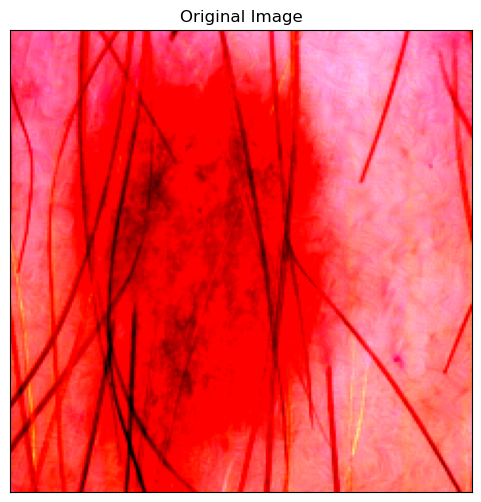

In [8]:
_ = viz.visualize_image_attr(None, np.transpose(res[0]['best_adv'][0], (1, 2, 0)) , 
                      method="original_image", title="Original Image")
# print(res[0]['best_adv'])

## GRAD

In [9]:
algorithm = Saliency(model)

In [12]:
benres = main.run_benign(algorithm, model, val_loader, num_batches)

Attribution for batch 0 complete
Attribution for batch 1 complete
Attribution for batch 2 complete
Attribution for batch 3 complete
Attribution for batch 4 complete
Attribution for batch 5 complete
Attribution for batch 6 complete
Attribution for batch 7 complete
Attribution for batch 8 complete
Attribution for batch 9 complete


In [11]:
adv2res = main.run_adv2(algorithm, model, res, val_loader, num_batches)

Attribution for batch 0 complete
Attribution for batch 1 complete
Attribution for batch 2 complete
Attribution for batch 3 complete
Attribution for batch 4 complete
Attribution for batch 5 complete
Attribution for batch 6 complete
Attribution for batch 7 complete
Attribution for batch 8 complete
Attribution for batch 9 complete
ADV2 Calculation Complete


In [13]:
skin_adv2_grad = {}
skin_adv2_grad['ben'] = benres
skin_adv2_grad['adv2'] = adv2res
with open('skin_adv2_grad.pkl', 'wb') as f:
    pickle.dump(skin_adv2_grad, f)
# with open('skin_adv2_grad.pkl', 'rb') as fp:
#     skin_adv2_grad = pickle.load(fp)

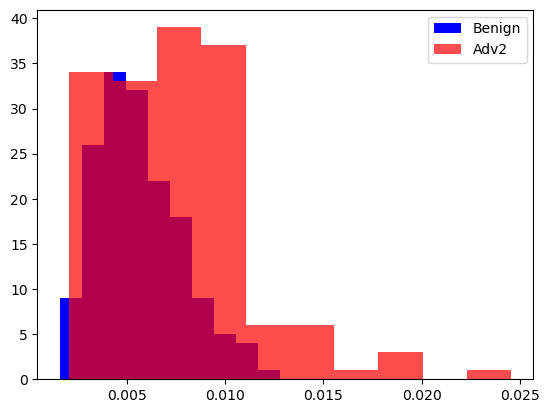

In [60]:
ind = 1

plt.hist(skin_adv2_grad['ben'][ind], label='Benign', color='blue')
plt.hist(skin_adv2_grad['adv2'][ind], label='Adv2', alpha=0.7, color='red')
plt.legend()
plt.show()

0.1
0.11875


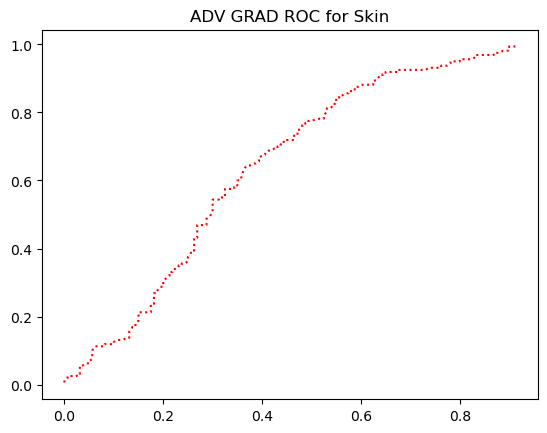

In [62]:
import roc_curve
ind = 1
x1, y1 = roc_curve.max_roc_curve(skin_adv2_grad['ben'][ind], skin_adv2_grad['adv2'][ind], 1000)

fpr_res = 0
tpr_res = 0
i = 0
for a in x1:
    if abs(a - 0.1) < abs(fpr_res - 0.1):
        fpr_res = a
        tpr_res = y1[i]
    i+=1
        
print(fpr_res)
print(tpr_res)

plt.title("ADV GRAD ROC for Skin")
plt.plot(x1, y1, "red", linestyle = 'dotted', label = "ADV2")
plt.show()

## IG

In [31]:
algorithm = IntegratedGradients(model)

In [32]:
benresig = main.run_benign(algorithm, model, val_loader, num_batches)

Attribution for batch 0 complete
Attribution for batch 1 complete
Attribution for batch 2 complete
Attribution for batch 3 complete
Attribution for batch 4 complete
Attribution for batch 5 complete
Attribution for batch 6 complete
Attribution for batch 7 complete
Attribution for batch 8 complete
Attribution for batch 9 complete


In [33]:
adv2resig = main.run_adv2(algorithm, model, res, val_loader, num_batches)

Attribution for batch 0 complete
Attribution for batch 1 complete
Attribution for batch 2 complete
Attribution for batch 3 complete
Attribution for batch 4 complete
Attribution for batch 5 complete
Attribution for batch 6 complete
Attribution for batch 7 complete
Attribution for batch 8 complete
Attribution for batch 9 complete
ADV2 Calculation Complete


In [34]:
skin_adv2_ig = {}
skin_adv2_ig['ben'] = benresig
skin_adv2_ig['adv2'] = adv2resig
with open('skin_adv2_ig.pkl', 'wb') as f:
    pickle.dump(skin_adv2_ig, f)
# with open('skin_adv2_ig.pkl', 'rb') as fp:
#     skin_adv2_ig = pickle.load(fp)

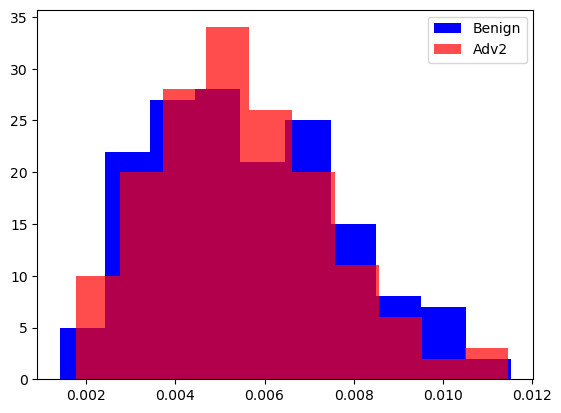

In [63]:
ind = 1

plt.hist(skin_adv2_ig['ben'][ind], label='Benign', color='blue')
plt.hist(skin_adv2_ig['adv2'][ind], label='Adv2', alpha=0.7, color='red')
plt.legend()
plt.show()

0.1
0.1625


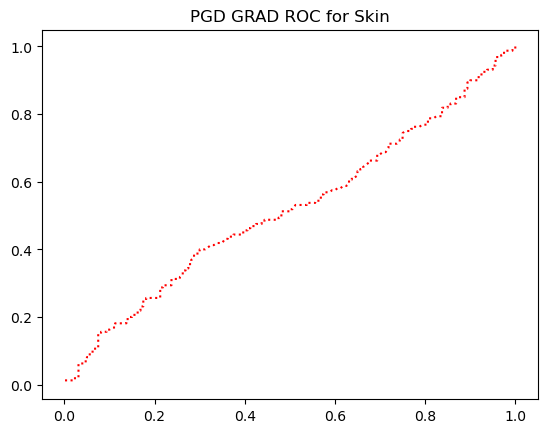

In [65]:
ind = 1
x1, y1 = roc_curve.min_roc_curve(skin_adv2_ig['ben'][ind], skin_adv2_ig['adv2'][ind], 1000)

fpr_res = 0
tpr_res = 0
i = 0
for a in x1:
    if abs(a - 0.1) < abs(fpr_res - 0.1):
        fpr_res = a
        tpr_res = y1[i]
    i+=1
        
print(fpr_res)
print(tpr_res)

plt.title("PGD GRAD ROC for Skin")
plt.plot(x1, y1, "red", linestyle = 'dotted', label = "ADV2")
plt.show()

## GRAD with Noise

In [47]:
algorithm = Saliency(model)
spread = 0.15

In [48]:
resgradnoise = main.run_benign_noise(algorithm, model, val_loader, num_batches, spread)

Attribution for batch 0 complete
Attribution for batch 1 complete
Attribution for batch 2 complete
Attribution for batch 3 complete
Attribution for batch 4 complete
Attribution for batch 5 complete
Attribution for batch 6 complete
Attribution for batch 7 complete
Attribution for batch 8 complete
Attribution for batch 9 complete


In [49]:
adv2resgradnoise = main.run_adv2_noise(algorithm, model, res, val_loader, num_batches, spread)

Attribution for batch 0 complete
Attribution for batch 1 complete
Attribution for batch 2 complete
Attribution for batch 3 complete
Attribution for batch 4 complete
Attribution for batch 5 complete
Attribution for batch 6 complete
Attribution for batch 7 complete
Attribution for batch 8 complete
Attribution for batch 9 complete
ADV2 Calculation Complete


In [50]:
skin_adv2_grad_noise = {}
skin_adv2_grad_noise['ben'] = resgradnoise
skin_adv2_grad_noise['adv2'] = adv2resgradnoise
with open('skin_adv2_grad_noise.pkl', 'wb') as f:
    pickle.dump(skin_adv2_grad_noise, f)
# with open('skin_adv2_grad_noise.pkl', 'rb') as fp:
#     skin_adv2_grad_noise = pickle.load(fp)

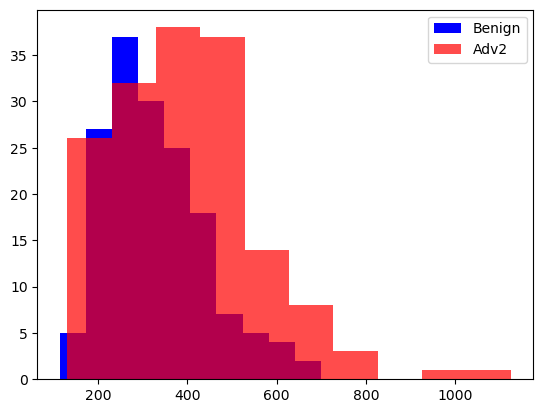

In [66]:
plt.hist(skin_adv2_grad_noise['ben'], label='Benign', color='blue')
plt.hist(skin_adv2_grad_noise['adv2'], label='Adv2', alpha=0.7, color='red')
plt.legend()
plt.show()

0.1
0.09375


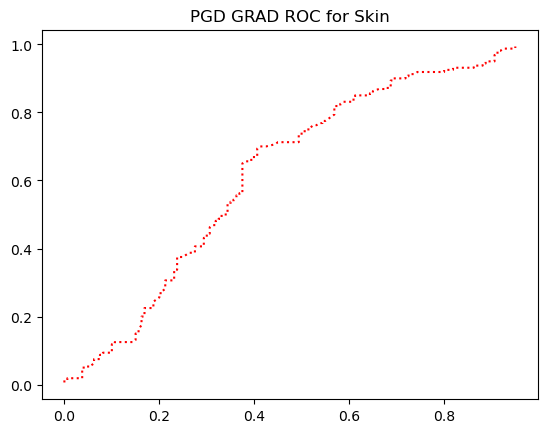

In [69]:
x1, y1 = roc_curve.max_roc_curve(skin_adv2_grad_noise['ben'], skin_adv2_grad_noise['adv2'], 1000)

fpr_res = 0
tpr_res = 0
i = 0
for a in x1:
    if abs(a - 0.1) < abs(fpr_res - 0.1):
        fpr_res = a
        tpr_res = y1[i]
    i+=1
        
print(fpr_res)
print(tpr_res)

plt.title("PGD GRAD ROC for Skin")
plt.plot(x1, y1, "red", linestyle = 'dotted', label = "ADV2")
plt.show()

## IG with Noise

In [54]:
algorithm = IntegratedGradients(model)
spread = 0.15

In [55]:
resignoise = main.run_benign_noise(algorithm, model, val_loader, num_batches, spread)

Attribution for batch 0 complete
Attribution for batch 1 complete
Attribution for batch 2 complete
Attribution for batch 3 complete
Attribution for batch 4 complete
Attribution for batch 5 complete
Attribution for batch 6 complete
Attribution for batch 7 complete
Attribution for batch 8 complete
Attribution for batch 9 complete


In [56]:
adv2resignoise = main.run_adv2_noise(algorithm, model, res, val_loader, num_batches, spread)

Attribution for batch 0 complete
Attribution for batch 1 complete
Attribution for batch 2 complete
Attribution for batch 3 complete
Attribution for batch 4 complete
Attribution for batch 5 complete
Attribution for batch 6 complete
Attribution for batch 7 complete
Attribution for batch 8 complete
Attribution for batch 9 complete
ADV2 Calculation Complete


In [57]:
skin_adv2_ig_noise = {}
skin_adv2_ig_noise['ben'] = resignoise
skin_adv2_ig_noise['adv2'] = adv2resignoise
with open('skin_adv2_ig_noise.pkl', 'wb') as f:
    pickle.dump(skin_adv2_ig_noise, f)
# with open('skin_adv2_ig_noise.pkl', 'rb') as fp:
#     skin_adv2_ig_noise = pickle.load(fp)

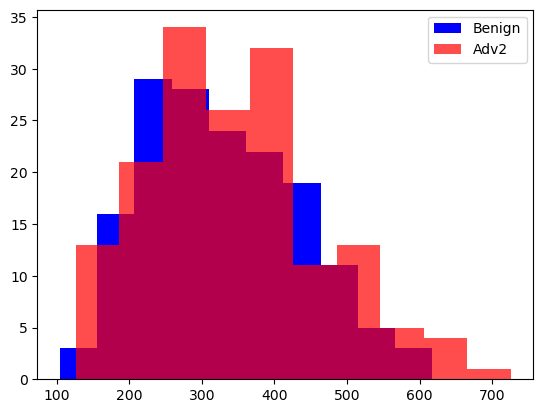

In [70]:
plt.hist(skin_adv2_ig_noise['ben'], label='Benign', color='blue')
plt.hist(skin_adv2_ig_noise['adv2'], label='Adv2', alpha=0.7, color='red')
plt.legend()
plt.show()

0.1
0.1


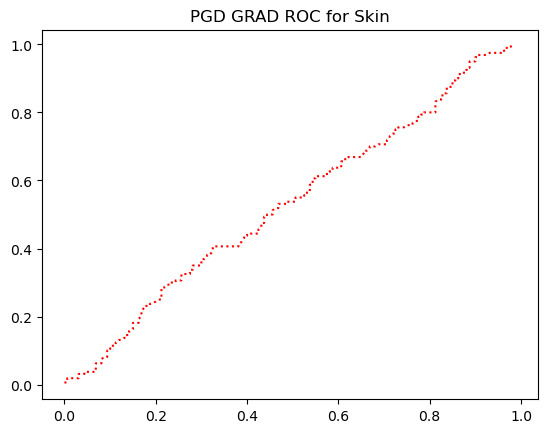

In [73]:
x1, y1 = roc_curve.max_roc_curve(skin_adv2_ig_noise['ben'], skin_adv2_ig_noise['adv2'], 1000)

fpr_res = 0
tpr_res = 0
i = 0
for a in x1:
    if abs(a - 0.1) < abs(fpr_res - 0.1):
        fpr_res = a
        tpr_res = y1[i]
    i+=1
        
print(fpr_res)
print(tpr_res)

plt.title("PGD GRAD ROC for Skin")
plt.plot(x1, y1, "red", linestyle = 'dotted', label = "ADV2")
plt.show()